# Final Project : Klasifikasi Citra Kucing dan Anjing

#### Faturahman Yudanto | 16/400356/TK/45370


Pada final project ini, akan dilakukan proses klasifikasi citra (Image Classification) antara kucing dan anjing.

### Import Library
Langkah pertama yang dilakukan adalah mengimport library yang akan digunakan untuk proses ini.

In [29]:
from os import listdir
from numpy import asarray,save
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from skimage import transform
import random

folder_train = 'cat-and-dog//training_set//training_set'
folder_test = 'cat-and-dog//test_set//test_set'


## Muat data dan prapemrosesan data

Proses selanjutnya adalah memuat data latih citra. Selain itu dilakukan juga beberapa langkah augmentasi data atau data augmentation(penambahan data latih citra). Proses data augmentation yang dilakukan antara lain menambahkan citra yang dicerminkan dan citra yang dirotasi dengan sudut antara -30 hingga 30 derajat secara acak

In [30]:
image_data_train = []
image_data_test = []
labels_train = []
labels_test = []

for files in listdir(folder_train+'//cats'):
    if '.jpg' in files:
        image = cv2.imread(folder_train+'//cats//'+files,0)
        image = cv2.resize(image,(180,180))
        img_flip = np.fliplr(image)
        img_rot = transform.rotate(image,random.uniform(-30,30))
        image = img_to_array(image)
        img_rot = img_to_array(img_rot)
        img_flip = img_to_array(img_flip)
        image_data_train.append(image)
        labels_train.append(1)
        image_data_train.append(img_rot)
        labels_train.append(1)
        image_data_train.append(img_flip)
        labels_train.append(1)

for files in listdir(folder_train+'//dogs'):
    if '.jpg' in files:
        image = cv2.imread(folder_train+'//dogs//'+files,0)
        image = cv2.resize(image,(180,180))
        img_flip = np.fliplr(image)
        img_rot = transform.rotate(image,random.uniform(-30,30))
        image = img_to_array(image)
        img_rot = img_to_array(img_rot)
        img_flip = img_to_array(img_flip)
        image_data_train.append(image)
        labels_train.append(0)
        image_data_train.append(img_rot)
        labels_train.append(0)
        image_data_train.append(img_flip)
        labels_train.append(0)

for files in listdir(folder_test+'//cats'):
    if '.jpg' in files:
        image = cv2.imread(folder_test+'//cats//'+files,0)
        image = cv2.resize(image,(180,180))
        image = img_to_array(image)
        image_data_test.append(image)
        labels_test.append(1)

for files in listdir(folder_test+'//dogs'):
    if '.jpg' in files:
        image = cv2.imread(folder_test+'//dogs//'+files,0)
        image = cv2.resize(image,(180,180))
        image = img_to_array(image)
        image_data_test.append(image)
        labels_test.append(0)



## Normalisasi data

Pada data citra dilakukan normalisasi data agar distribusi data seragam dan proses training model dapat berjalan dan konvergen lebih cepat

In [31]:
image_data_train = np.array(image_data_train,dtype='float16')/255.0
labels_train = np.array(labels_train)
image_data_test = np.array(image_data_test,dtype='float16')/255.0
labels_test = np.array(labels_test)

## Mengubah output kategorikal ke bentuk matriks

Luaran data latih ini berbentuk kategorikal, untuk itu data harus diubah ke bentuk matriks dengan menggunakan metode One-Hot Encoder

In [32]:
from tensorflow.keras.utils import to_categorical
labels_train = to_categorical(labels_train,num_classes=2)
labels_test = to_categorical(labels_test,num_classes=2)

Berikut merupakan contoh hasil pengubahan data kategorikal ke matriks

In [48]:
print("Matriks untuk label kucing = ",labels_train[0])
print("Matriks untuk label anjing = ",labels_train[24000])

Matriks untuk label kucing =  [0. 1.]
Matriks untuk label anjing =  [1. 0.]


## Penyusunan Arsitektur Deep Learning

Arsitektur Deep Learning yang digunakan adalah dengan metode CNN. Arsitektur terdiri atas 5 layer konvolusi dan max pooling

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(180,180,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 178, 178, 32)      320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 18, 64)       

## Training Data

Model deep learining dilatih menggunakan data latih sebanyak 24015 data dengan epoch sebanyak 15. Nilai batch size yang digunakan adalah 20

In [40]:
arch = model.fit(image_data_train,labels_train,epochs=15,validation_data = (image_data_test,labels_test), shuffle= True, batch_size = 20)

Train on 24015 samples, validate on 2023 samples
Epoch 1/15
24015/24015 [==============================] - 124s 5ms/sample - loss: 0.6934 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 2/15
24015/24015 [==============================] - 123s 5ms/sample - loss: 0.6926 - accuracy: 0.5049 - val_loss: 0.6895 - val_accuracy: 0.5430
Epoch 3/15
24015/24015 [==============================] - 128s 5ms/sample - loss: 0.6757 - accuracy: 0.5554 - val_loss: 0.6304 - val_accuracy: 0.6409
Epoch 4/15
24015/24015 [==============================] - 126s 5ms/sample - loss: 0.6374 - accuracy: 0.6116 - val_loss: 0.5993 - val_accuracy: 0.6873
Epoch 5/15
24015/24015 [==============================] - 126s 5ms/sample - loss: 0.6026 - accuracy: 0.6403 - val_loss: 0.5357 - val_accuracy: 0.7294
Epoch 6/15
24015/24015 [==============================] - 125s 5ms/sample - loss: 0.5581 - accuracy: 0.6738 - val_loss: 0.4696 - val_accuracy: 0.7781
Epoch 7/15
24015/24015 [===========================

## Plot diagram akurasi dan loss pada tiap-tiap epoch

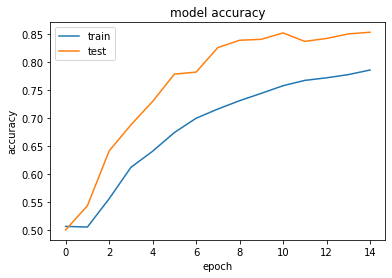

In [41]:
import matplotlib.pyplot as plt 
# summarize history for accuracy
plt.plot(arch.history['accuracy'])
plt.plot(arch.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


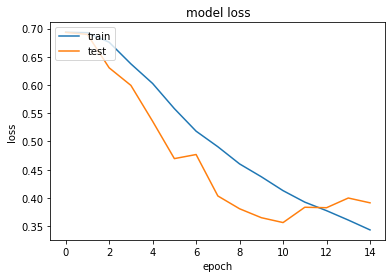

In [42]:
# summarize history for loss
plt.plot(arch.history['loss'])
plt.plot(arch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Coba Prediksi

Berikut merupakan percobaan hasil prediksi salah satu data tes citra

Prediksi : 
anjing =  2.7512526e-06
kucing =  0.9999962


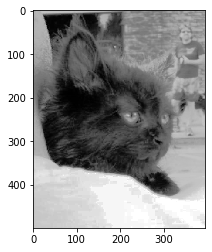

In [20]:
test_img = cv2.imread('cat-and-dog//test_set//test_set//cats//cat.4212.jpg',0)
#test_img = cv2.imread('Foto.jpg',0)#
test_img = cv2.equalizeHist(test_img)
test_imga = cv2.resize(test_img,(180,180))
test_imga = np.array(test_imga,dtype='float32')/255.0
test_imga = np.expand_dims(test_imga,axis=2)
test_imga = np.expand_dims(test_imga,axis=0)

prob = model.predict_proba(test_imga)
print('Prediksi : ')
print('anjing = ',prob[0][0])
print('kucing = ',prob[0][1])
plt.imshow(test_img,cmap='gray')